In [46]:
from transformers import pipeline
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [47]:
model = TFAutoModelForSequenceClassification.from_pretrained("michelecafagna26/gpt2-medium-finetuned-sst2-sentiment")

tokenizer = AutoTokenizer.from_pretrained("michelecafagna26/gpt2-medium-finetuned-sst2-sentiment",
                                          truncation = True, max_length = 1024, padding = True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFGPT2ForSequenceClassification: ['transformer.h.8.attn.masked_bias', 'transformer.h.22.attn.masked_bias', 'transformer.h.21.attn.masked_bias', 'transformer.h.7.attn.masked_bias', 'transformer.h.19.attn.masked_bias', 'transformer.h.12.attn.masked_bias', 'transformer.h.20.attn.masked_bias', 'transformer.h.15.attn.masked_bias', 'transformer.h.16.attn.masked_bias', 'transformer.h.0.attn.masked_bias', 'transformer.h.5.attn.masked_bias', 'transformer.h.11.attn.masked_bias', 'transformer.h.14.attn.masked_bias', 'transformer.h.18.attn.masked_bias', 'transformer.h.2.attn.masked_bias', 'transformer.h.9.attn.masked_bias', 'transformer.h.6.attn.masked_bias', 'transformer.h.4.attn.masked_bias', 'transformer.h.23.attn.masked_bias', 'transformer.h.10.attn.masked_bias', 'transformer.h.17.attn.masked_bias', 'transformer.h.3.attn.masked_bias', 'transformer.h.1.attn.masked_bias', 'transformer.h.13.attn.masked_bias']
- Thi

In [48]:
classifier = pipeline("sentiment-analysis", model = model, tokenizer = tokenizer)

Device set to use 0


In [49]:
df = pd.read_csv('..\data\IMDB Dataset.csv')

In [50]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [51]:
classifier(['I really enjoyed this movie',
            'This movie was terrible',
            ])

[{'label': 'POSITIVE', 'score': 0.9999853372573853},
 {'label': 'NEGATIVE', 'score': 0.9862412214279175}]

In [52]:
df['sentiment'][df['sentiment'] == 'negative'] = 'NEGATIVE'
df['sentiment'][df['sentiment'] == 'positive'] = 'POSITIVE'

C:\Users\Ars\AppData\Local\Temp\ipykernel_16484\1981382885.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['sentiment'][df['sentiment'] == 'negative'] = 'NEGATIVE'
C:\Users\Ars\AppData\Local\Temp\ipykernel_16484\1981382885.py:2: Futur

In [53]:
df = df[:13500]

In [54]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,POSITIVE
1,A wonderful little production. <br /><br />The...,POSITIVE
2,I thought this was a wonderful way to spend ti...,POSITIVE
3,Basically there's a family where a little boy ...,NEGATIVE
4,"Petter Mattei's ""Love in the Time of Money"" is...",POSITIVE
...,...,...
13495,I saw this at a screening last night too. I wa...,POSITIVE
13496,"An executive, very successful in his professio...",NEGATIVE
13497,"A sprawling, overambitious, plotless comedy th...",NEGATIVE
13498,"I watched this movie last night, and let me sa...",NEGATIVE


In [55]:
df_2 = df.copy()

In [56]:
df_2

,review,sentiment
0,One of the other reviewers has mentioned that ...,POSITIVE
1,A wonderful little production. <br /><br />The...,POSITIVE
2,I thought this was a wonderful way to spend ti...,POSITIVE
3,Basically there's a family where a little boy ...,NEGATIVE
4,"Petter Mattei's ""Love in the Time of Money"" is...",POSITIVE
...,...,...
13495,I saw this at a screening last night too. I wa...,POSITIVE
13496,"An executive, very successful in his professio...",NEGATIVE
13497,"A sprawling, overambitious, plotless comedy th...",NEGATIVE
13498,"I watched this movie last night, and let me sa...",NEGATIVE


In [57]:
tokenized = tokenizer(df_2['review'].tolist(), truncation=True, padding=True, return_tensors='tf')

In [58]:
print(tokenized.keys())


dict_keys(['input_ids', 'attention_mask'])


In [59]:
df_2['reviews'] = tokenized['input_ids'].numpy().tolist()

In [60]:
df_2

,review,sentiment,reviews
0,One of the other reviewers has mentioned that ...,POSITIVE,"[3198, 286, 262, 584, 30702, 468, 4750, 326, 7..."
1,A wonderful little production. <br /><br />The...,POSITIVE,"[32, 7932, 1310, 3227, 13, 1279, 1671, 1220, 6..."
2,I thought this was a wonderful way to spend ti...,POSITIVE,"[40, 1807, 428, 373, 257, 7932, 835, 284, 4341..."
3,Basically there's a family where a little boy ...,NEGATIVE,"[31524, 612, 338, 257, 1641, 810, 257, 1310, 2..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",POSITIVE,"[25803, 353, 38789, 72, 338, 366, 18565, 287, ..."
...,...,...,...
13495,I saw this at a screening last night too. I wa...,POSITIVE,"[40, 2497, 428, 379, 257, 14135, 938, 1755, 11..."
13496,"An executive, very successful in his professio...",NEGATIVE,"[2025, 4640, 11, 845, 4388, 287, 465, 4708, 12..."
13497,"A sprawling, overambitious, plotless comedy th...",NEGATIVE,"[32, 30190, 11, 625, 321, 14228, 11, 7110, 120..."
13498,"I watched this movie last night, and let me sa...",NEGATIVE,"[40, 7342, 428, 3807, 938, 1755, 11, 290, 1309..."


In [61]:
df_2['reviews_decoded'] = df_2['reviews'].apply(lambda x: tokenizer.decode(x))

In [62]:
df_2.head()

,review,sentiment,reviews,reviews_decoded
0,One of the other reviewers has mentioned that ...,POSITIVE,"[3198, 286, 262, 584, 30702, 468, 4750, 326, 7...",One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,POSITIVE,"[32, 7932, 1310, 3227, 13, 1279, 1671, 1220, 6...",A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...,POSITIVE,"[40, 1807, 428, 373, 257, 7932, 835, 284, 4341...",I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,NEGATIVE,"[31524, 612, 338, 257, 1641, 810, 257, 1310, 2...",Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",POSITIVE,"[25803, 353, 38789, 72, 338, 366, 18565, 287, ...","Petter Mattei's ""Love in the Time of Money"" is..."


In [63]:
df_2['reviews_decoded'] = df_2['reviews_decoded'].str.replace(r'^\[CLS\]', '', regex=True)
df_2['reviews_decoded'] = df_2['reviews_decoded'].str.replace(r'\[SEP\]$', '', regex=True)
df_2['reviews_decoded'] = df_2['reviews_decoded'].str.replace(r'\[PAD\]', '', regex=True)
df_2['reviews_decoded'] = df_2['reviews_decoded'].str.replace(r'< br / >', '', regex=True)



# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
df_2['reviews_decoded'] = df_2['reviews_decoded'].str.replace(r'<\|endoftext\|>', '', regex=True)



In [64]:
X = df_2['reviews_decoded']
y = df_2['sentiment']

In [65]:
X

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
13495    I saw this at a screening last night too. I wa...
13496    An executive, very successful in his professio...
13497    A sprawling, overambitious, plotless comedy th...
13498    I watched this movie last night, and let me sa...
13499    Ah yet another Seagal movie.In no less than a ...
Name: reviews_decoded, Length: 13500, dtype: object

In [66]:
y

0        POSITIVE
1        POSITIVE
2        POSITIVE
3        NEGATIVE
4        POSITIVE
           ...   
13495    POSITIVE
13496    NEGATIVE
13497    NEGATIVE
13498    NEGATIVE
13499    NEGATIVE
Name: sentiment, Length: 13500, dtype: object

# 50/50

In [67]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [68]:
X_train

7300     This movie's full title is "Waqt: Race Against...
9011     A fairly enjoyable kidnapping caper set in New...
3871     I'm a sucker for a decent superhero movie. (I'...
1219     The long list of "big" names in this flick (in...
7003     After enjoying this show for years, I use to d...
                               ...                        
12230    This is an astonishingly bad action film. I'd ...
7257     To judge a movie just for the landscapes,decor...
898      Why else would he do this to me?<br /><br />No...
4022     Harrison Ford playing a playing a cop in a cri...
10883    A magical journey concocted by Alexander Korda...
Name: reviews_decoded, Length: 9450, dtype: object

In [69]:
len(X_test), len(X_train)

(4050, 9450)

In [70]:
len(y_test), len(y_train)

(4050, 9450)

In [71]:
y_test.value_counts()

sentiment
NEGATIVE    2043
POSITIVE    2007
Name: count, dtype: int64

In [72]:
y_train.value_counts()

sentiment
NEGATIVE    4768
POSITIVE    4682
Name: count, dtype: int64

In [73]:
y_test

783      NEGATIVE
3980     NEGATIVE
1171     POSITIVE
3450     NEGATIVE
9769     POSITIVE
           ...   
11783    NEGATIVE
3218     POSITIVE
1660     POSITIVE
12648    NEGATIVE
234      POSITIVE
Name: sentiment, Length: 4050, dtype: object

In [74]:
results = classifier(X_test.to_list())

In [75]:
results

[{'label': 'NEGATIVE', 'score': 0.9980378746986389},
 {'label': 'NEGATIVE', 'score': 0.9999184608459473},
 {'label': 'POSITIVE', 'score': 0.995376467704773},
 {'label': 'POSITIVE', 'score': 0.7430829405784607},
 {'label': 'POSITIVE', 'score': 0.9999964237213135},
 {'label': 'POSITIVE', 'score': 0.8304421305656433},
 {'label': 'POSITIVE', 'score': 0.9999971389770508},
 {'label': 'NEGATIVE', 'score': 0.9993640780448914},
 {'label': 'NEGATIVE', 'score': 0.9997543692588806},
 {'label': 'NEGATIVE', 'score': 0.999987006187439},
 {'label': 'NEGATIVE', 'score': 0.9999990463256836},
 {'label': 'POSITIVE', 'score': 0.9968200922012329},
 {'label': 'NEGATIVE', 'score': 0.9999988079071045},
 {'label': 'POSITIVE', 'score': 0.9981929659843445},
 {'label': 'NEGATIVE', 'score': 0.9999786615371704},
 {'label': 'NEGATIVE', 'score': 0.9999979734420776},
 {'label': 'NEGATIVE', 'score': 0.9447321891784668},
 {'label': 'POSITIVE', 'score': 0.9999468326568604},
 {'label': 'NEGATIVE', 'score': 0.99999380111694

In [76]:
# results_df = pd.DataFrame(results)
# results_df.to_csv(r'..\data\results_GPT-2.csv', index=False)

In [77]:
y_pred = [result['label'] for result in results]

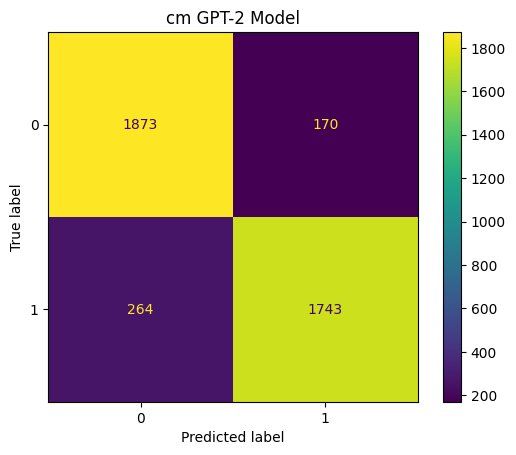

In [78]:
cm = confusion_matrix(y_test, y_pred, labels=['POSITIVE', 'NEGATIVE'])
cm = confusion_matrix(y_test, y_pred)
disp_cm = ConfusionMatrixDisplay(cm)

disp_cm.plot()  
plt.title('cm GPT-2 Model')
plt.show()

In [79]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8928395061728395
